# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Aditi Saini\Downloads\Clean_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df.shape

(300153, 11)

In [9]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [11]:
df1 = df.groupby(['flight','airline'], as_index = False).count()
df1.head()

,flight,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,6E-102,Indigo,39,39,39,39,39,39,39,39,39
1,6E-105,Indigo,5,5,5,5,5,5,5,5,5
2,6E-113,Indigo,49,49,49,49,49,49,49,49,49
3,6E-121,Indigo,20,20,20,20,20,20,20,20,20
4,6E-123,Indigo,5,5,5,5,5,5,5,5,5


In [12]:
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

In [13]:
df2 = df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

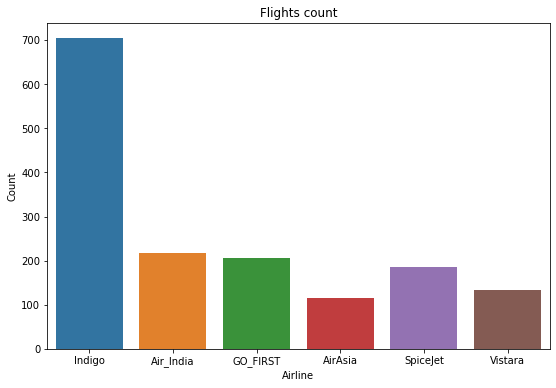

In [14]:
plt.figure(figsize = (9,6))
sns.countplot(df1.airline)
plt.title("Flights count")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.show()

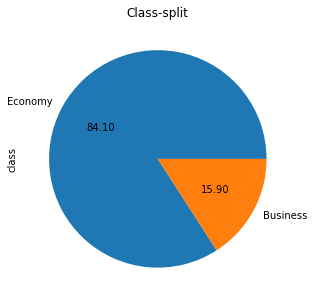

In [15]:
plt.figure(figsize = (8,5))
df2['class'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Class-split')
plt.show()

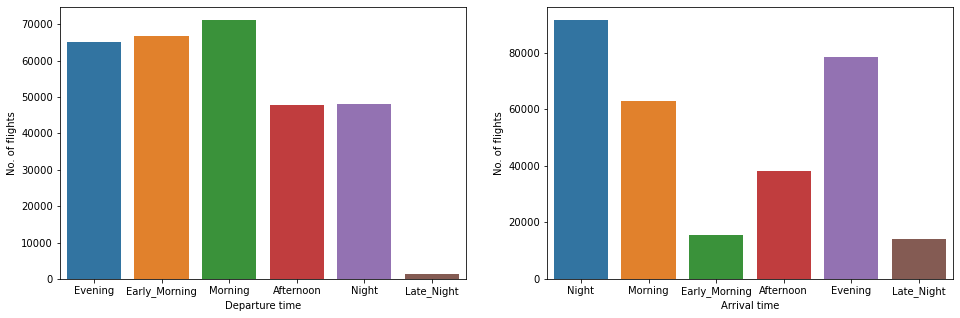

In [16]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
sns.countplot(df.departure_time)
plt.xlabel("Departure time")
plt.ylabel("No. of flights")
plt.subplot(1,2,2)
sns.countplot(data=df, x='arrival_time')
plt.xlabel("Arrival time")
plt.ylabel("No. of flights")

plt.show()

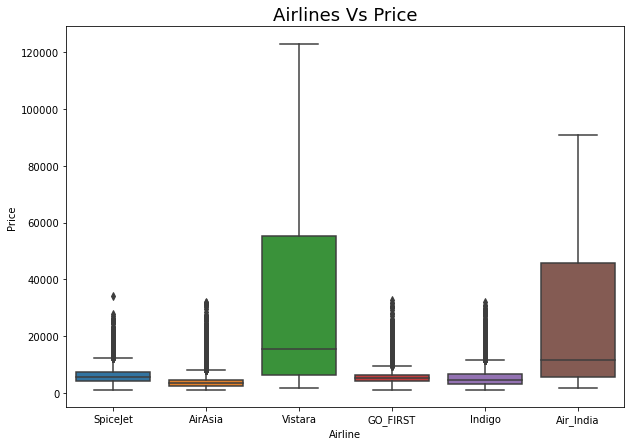

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(df['airline'], df['price'])
plt.title('Airlines Vs Price', fontsize =18)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

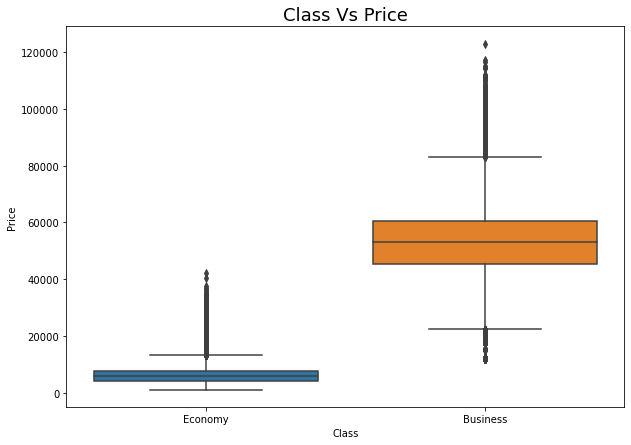

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(df['class'], df['price'])
plt.title('Class Vs Price', fontsize =18)
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

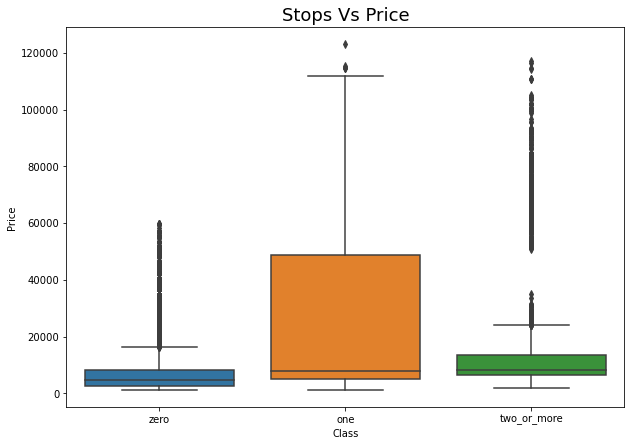

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(df['stops'], df['price'])
plt.title('Stops Vs Price', fontsize =18)
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

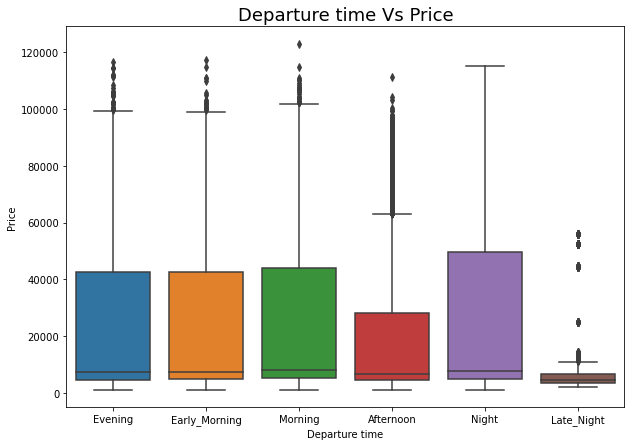

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(df['departure_time'], df['price'])
plt.title('Departure time Vs Price', fontsize =18)
plt.xlabel('Departure time')
plt.ylabel('Price')
plt.show()

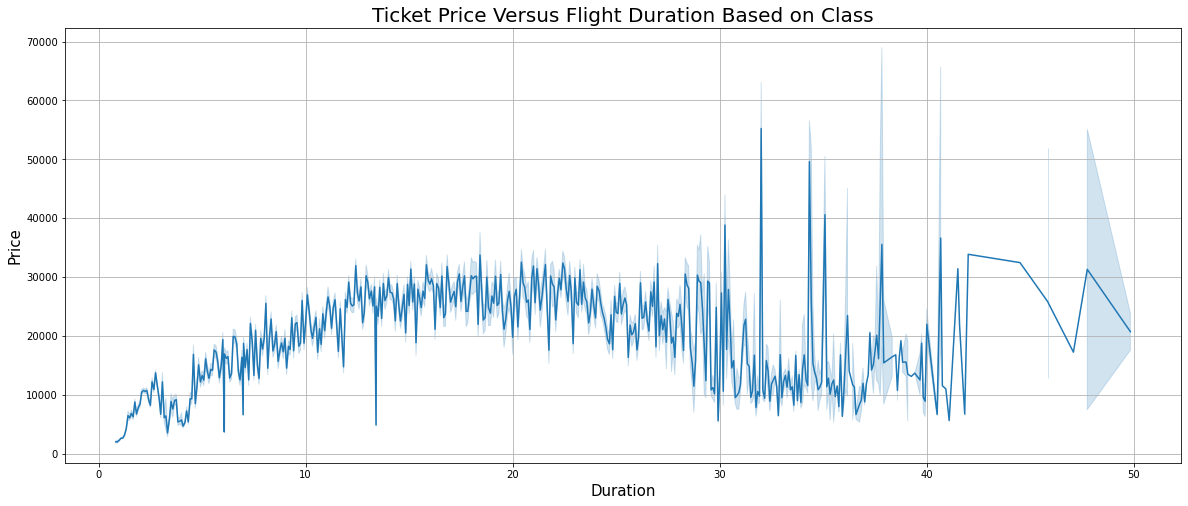

In [21]:
plt.figure(figsize=(20,8))
sns.lineplot(df['duration'], df['price'])
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.grid(True)
plt.show()

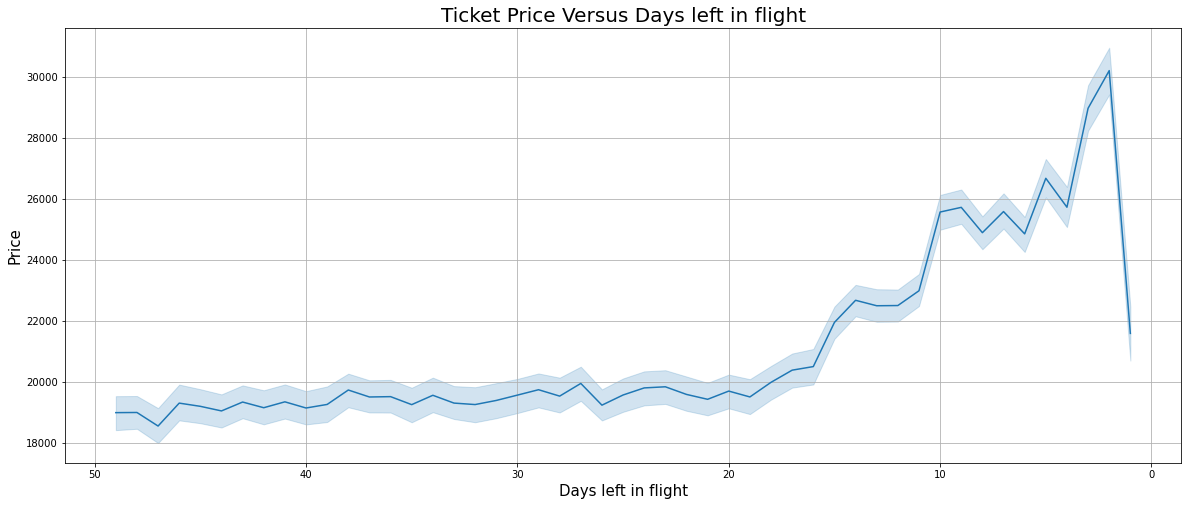

In [22]:
plt.figure(figsize=(20,8))
sns.lineplot(df['days_left'], df['price'])
plt.title('Ticket Price Versus Days left in flight',fontsize=20)
plt.xlabel('Days left in flight',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

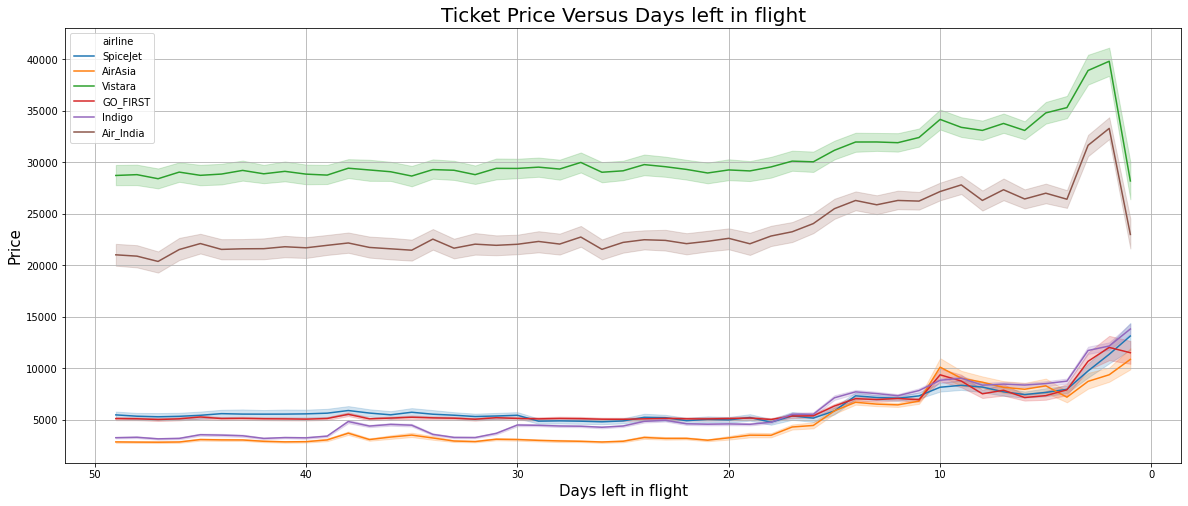

In [23]:
plt.figure(figsize=(20,8))
sns.lineplot(df['days_left'], df['price'], hue = df['airline'])
plt.title('Ticket Price Versus Days left in flight',fontsize=20)
plt.xlabel('Days left in flight',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

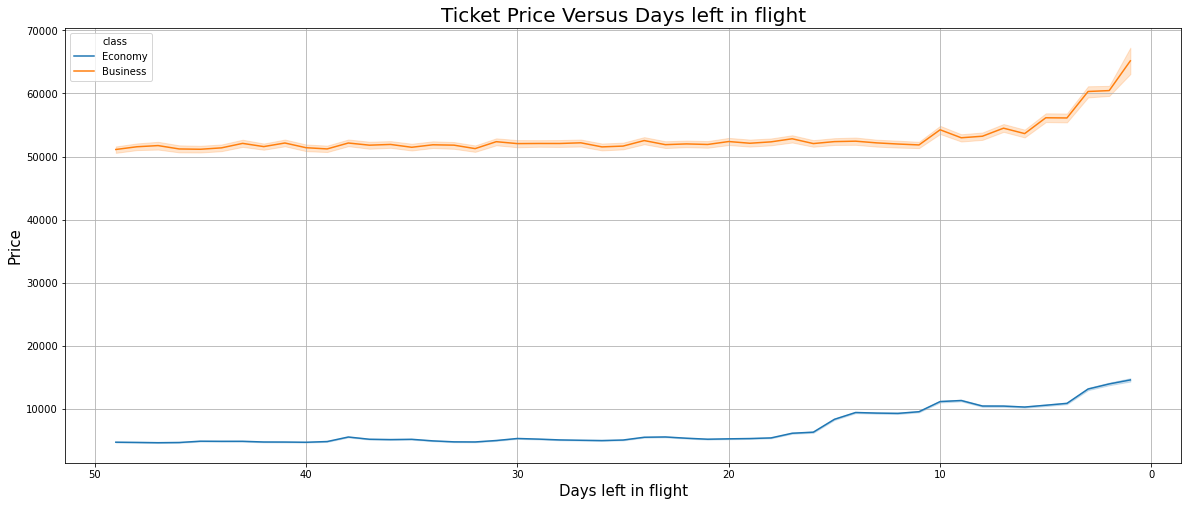

In [24]:
plt.figure(figsize=(20,8))
sns.lineplot(df['days_left'], df['price'], hue = df['class'])
plt.title('Ticket Price Versus Days left in flight',fontsize=20)
plt.xlabel('Days left in flight',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

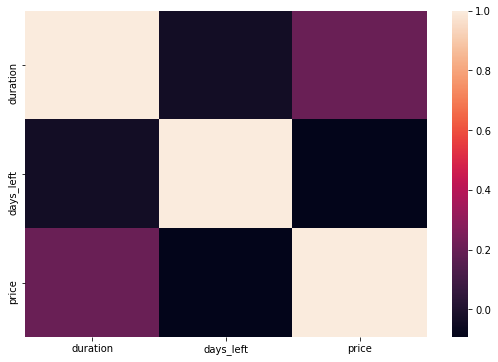

In [25]:
plt.figure(figsize = (9,6))
sns.heatmap(df.corr())
plt.show()

In [26]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [27]:
le = LabelEncoder()

# Label Encoding categorical features
categorical_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [28]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [29]:
# Split the data into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Function to calculate adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

Linear Regression R^2: 0.9048167063156316
Linear Regression Adjusted R^2: 0.9048008477195496
Linear Regression MSE: 49177643.41362868
Linear Regression RMSE: 7012.677335627862


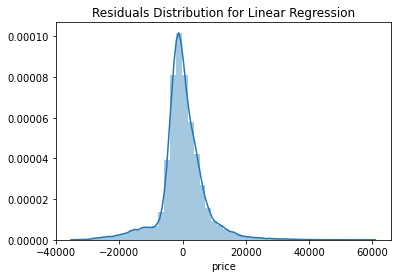

In [30]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Calculate R² and Adjusted R²
r2_lr = r2_score(y_test, y_pred_lr)
adj_r2_lr = adjusted_r2(r2_lr, len(X_test), X_test.shape[1])

print(f'Linear Regression R^2: {r2_lr}')
print(f'Linear Regression Adjusted R^2: {adj_r2_lr}')

# Calculate MSE and RMSE
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression RMSE: {rmse_lr}')

# Check residuals for normal distribution and homoscedasticity
residuals_lr = y_test - y_pred_lr
sns.distplot(residuals_lr, kde=True)
plt.title('Residuals Distribution for Linear Regression')
plt.show()

In [31]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Calculate R² and Adjusted R²
r2_rf = r2_score(y_test, y_pred_rf)
adj_r2_rf = adjusted_r2(r2_rf, len(X_test), X_test.shape[1])

print(f'Random Forest R^2: {r2_rf}')
print(f'Random Forest Adjusted R^2: {adj_r2_rf}')

# Calculate MSE and RMSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest R^2: 0.9895729423070035
Random Forest Adjusted R^2: 0.9895712050431427
Random Forest MSE: 5387270.236517603
Random Forest RMSE: 2321.0493826107195


In [32]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate R² and Adjusted R²
r2_knn = r2_score(y_test, y_pred_knn)
adj_r2_knn = adjusted_r2(r2_knn, len(X_test), X_test.shape[1])

print(f'KNN R^2: {r2_knn}')
print(f'KNN Adjusted R^2: {adj_r2_knn}')

# Calculate MSE and RMSE
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
print(f'KNN MSE: {mse_knn}')
print(f'KNN RMSE: {rmse_knn}')

KNN R^2: 0.9754833623344842
KNN Adjusted R^2: 0.9754792775897881
KNN MSE: 12666828.580380138
KNN RMSE: 3559.0488308507565


In [34]:
# Train the SVR model
regr = make_pipeline(StandardScaler(), LinearSVR(random_state=100, tol=1e-5))
regr.fit(X_train_scaled, y_train)

# Predict
y_pred_svr = regr.predict(X_test_scaled)

# Calculate R² and Adjusted R²
r2_svr = r2_score(y_test, y_pred_svr)
adj_r2_svr = adjusted_r2(r2_svr, len(X_test), X_test.shape[1])

print(f'SVR R^2: {r2_svr}')
print(f'SVR Adjusted R^2: {adj_r2_svr}')

# Calculate MSE and RMSE
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
print(f'SVR MSE: {mse_svr}')
print(f'SVR RMSE: {rmse_svr}')

SVR R^2: 0.8964286368523992
SVR Adjusted R^2: 0.8964113807105885
SVR MSE: 53511444.78805348
SVR RMSE: 7315.15172693318


In [40]:
# Model names
model_names = ['Linear Regression', 'Random Forest', 'KNN', 'SVR']

# R-squared and Adjusted R-squared values
Rsq = [r2_lr, r2_rf, r2_knn, r2_svr]
Adj_Rsq = [adj_r2_lr, adj_r2_rf, adj_r2_knn, adj_r2_svr]

# MSE and RMSE values
MSE = [mse_lr, mse_rf, mse_knn, mse_svr]
RMSE = [rmse_lr, rmse_rf, rmse_knn, rmse_svr]

# Create a DataFrame
result_df = pd.DataFrame({
    'Model': model_names,
    'Rsq values': Rsq,
    'Adj Rsq Values': Adj_Rsq,
    'MSE': MSE,
    'RMSE': RMSE
})

# Set 'Model' as index and round only MSE and RMSE values
result_df['MSE'] = result_df['MSE'].round(2)
result_df['RMSE'] = result_df['RMSE'].round(2)

# Print the final DataFrame
result_df = result_df.set_index('Model')
final_df = result_df
final_df

,Rsq values,Adj Rsq Values,MSE,RMSE
Model,,,,
Linear Regression,0.904817,0.904801,49177643.41,7012.68
Random Forest,0.989573,0.989571,5387270.24,2321.05
KNN,0.975483,0.975479,12666828.58,3559.05
SVR,0.896429,0.896411,53511444.79,7315.15
